# LeNet 5

In this notebook we are going to build a classification model for MNIST dataset. Our network is based on LeNet5 architecture.

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

This networks differs from the original network in the following ways

**Activation Layer**
**Pooling Layer**
**Dropout**


## Define the Model

In [81]:
from keras.layers import Input, Conv2D, Dense,AveragePooling2D, Flatten, Activation,Dense, Dropout
from keras.models import Model
from keras.backend import tf as ktf
import numpy as np
np.random.seed(123)




def lenet_model(**kwargs):
    
    input_shape = kwargs['input_shape']
    nb_classes  = kwargs['nb_classes']
    
    optimizer = kwargs['optimizer']
    loss      = kwargs['loss']
    mets      = kwargs['metrics']
    
    


    
    x_input = Input(input_shape)
    
    x = Conv2D(filters = 6, kernel_size = (5,5), strides = (1,1), \
               padding = "valid", kernel_initializer='glorot_uniform')(x_input)
    
    x = Activation("relu")(x)
    
    x = AveragePooling2D(pool_size = (2,2), strides = (2,2))(x)
    
    x = Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), 
               padding = "valid", name = "conv_1",kernel_initializer='glorot_uniform')(x)
    
    x = Activation("relu")(x)


    x = AveragePooling2D(pool_size = (2,2), strides = (2,2))(x)
    
    x = Flatten()(x)
    
    x = Dense(120, activation = "relu")(x)
    
    x = Dropout(rate = 0.5)(x)
    
    x = Dense(120, activation ="relu")(x)
    
    x = Dropout(rate = 0.5)(x)

    
    predictions = Dense(nb_classes, activation="softmax")(x)
    
    model = Model(inputs = x_input, outputs = predictions)
    model.compile(optimizer = optimizer, loss= loss, metrics = mets)

    
    return model

    


    



In [82]:
from keras.datasets import mnist
from keras.utils import np_utils


nb_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Reshape to add the channel
# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


x_train.shape

(60000, 28, 28, 1)

In [89]:
from keras import optimizers
from keras.callbacks import History, EarlyStopping




# Model Input Dictionary
model_input = {}

model_input['input_shape'] = x_train.shape[1:]
model_input['nb_classes']  = nb_classes

# Optimizer
sgd = optimizers.SGD(lr=0.005, momentum=0, decay=1e-6, nesterov=False)
model_input['optimizer'] = sgd
model_input['loss']      = 'categorical_crossentropy'
model_input['metrics']   = ['accuracy']

# Callbacks
early_stop_th = 10**-7
callbacks = [EarlyStopping(monitor='acc', min_delta=early_stop_th, patience=5, verbose=0, mode='auto')]



model = lenet_model(**model_input)
batch_size = 64
epochs = 100

hist = model.fit(x_train, y_train, validation_split = 0.1, 
                 batch_size = batch_size,callbacks = callbacks ,epochs = epochs, verbose = 1)





  



Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 202us/step - loss: 1.6131 - acc: 0.4639 - val_loss: 0.2699 - val_acc: 0.9327
Epoch 2/100
54000/54000 [==============================] - 10s 192us/step - loss: 0.5761 - acc: 0.8174 - val_loss: 0.1649 - val_acc: 0.9535
Epoch 3/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.3865 - acc: 0.8834 - val_loss: 0.1210 - val_acc: 0.9647
Epoch 4/100
54000/54000 [==============================] - 11s 196us/step - loss: 0.3074 - acc: 0.9094 - val_loss: 0.1001 - val_acc: 0.9703
Epoch 5/100
54000/54000 [==============================] - 12s 214us/step - loss: 0.2603 - acc: 0.9243 - val_loss: 0.0930 - val_acc: 0.9728
Epoch 6/100
54000/54000 [==============================] - 15s 279us/step - loss: 0.2336 - acc: 0.9322 - val_loss: 0.0806 - val_acc: 0.9743
Epoch 7/100
54000/54000 [==============================] - 12s 215us/step - loss: 0.2100 - acc: 0.9401 - val_lo

Epoch 59/100
54000/54000 [==============================] - 11s 195us/step - loss: 0.0571 - acc: 0.9831 - val_loss: 0.0457 - val_acc: 0.9885
Epoch 60/100
54000/54000 [==============================] - 10s 192us/step - loss: 0.0544 - acc: 0.9844 - val_loss: 0.0470 - val_acc: 0.9880
Epoch 61/100
54000/54000 [==============================] - 10s 189us/step - loss: 0.0538 - acc: 0.9842 - val_loss: 0.0459 - val_acc: 0.9877
Epoch 62/100
54000/54000 [==============================] - 10s 190us/step - loss: 0.0534 - acc: 0.9847 - val_loss: 0.0438 - val_acc: 0.9890
Epoch 63/100
54000/54000 [==============================] - 10s 190us/step - loss: 0.0534 - acc: 0.9845 - val_loss: 0.0466 - val_acc: 0.9887
Epoch 64/100
54000/54000 [==============================] - 10s 190us/step - loss: 0.0547 - acc: 0.9838 - val_loss: 0.0464 - val_acc: 0.9883
Epoch 65/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.0511 - acc: 0.9856 - val_loss: 0.0458 - val_acc: 0.9888
Epoch 66/100


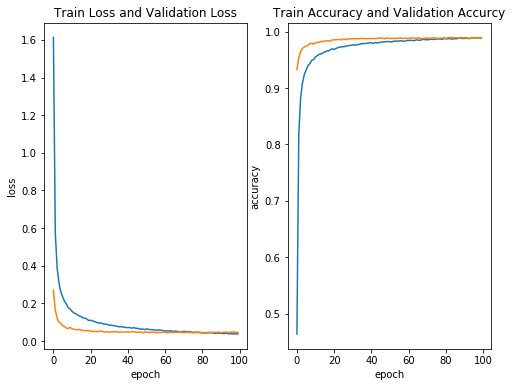

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_training(hist):

    fig = plt.figure(figsize=(8,6))
    plt.tight_layout()
    plt.subplot(121)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("Train Loss and Validation Loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc='upper left')
    plt.subplot(122)
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title("Train Accuracy and Validation Accurcy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc='upper left')



plot_training(hist)



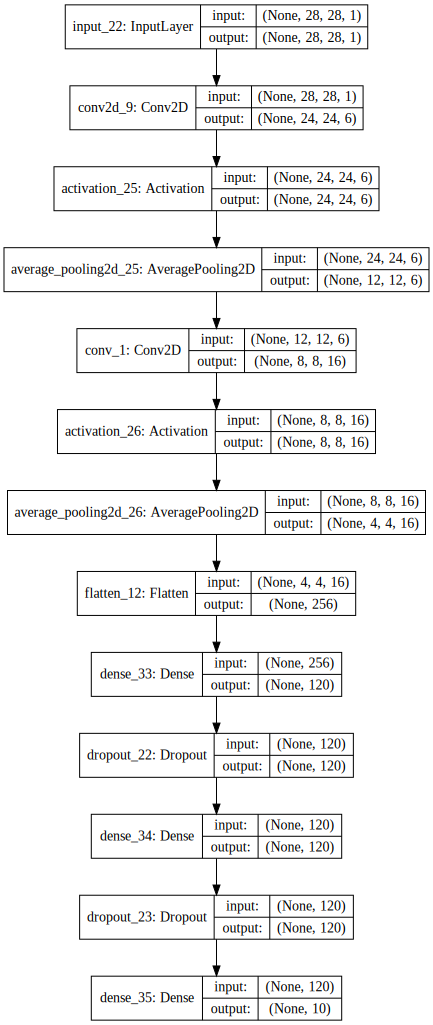

In [91]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))



In [92]:
print("\nTest Evaluation\n")
metrics = model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=1, sample_weight=None, steps=None)
for k,v in zip(model.metrics_names, metrics):
    print (k,v)
print('error {:0.2f}%'.format( (1-v) * 100 ))


Test Evaluation

10000/10000 [==============================] - 1s 81us/step
loss 0.0342100810715
acc 0.9903
error 0.97%


## Comparing Error %

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


